In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set()
sns.set_style("whitegrid")
sns.set_context('paper', rc={"font.size":12,
                             "axes.titlesize":12,
                             "axes.labelsize":12,
                             "xtick.labelsize":10,
                             "ytick.labelsize":10,
                             "legend.fontsize":10})

files = ['./stats_instant.pkl.noaggregate',
         './stats_ar.pkl.noaggregate']
cases = ['VIA-Instantaneous',
         'VIA-Auto-Regressive']
# mismatches = ['local',
#               'local',
#               'global',
#               'global']

dfs = []
for file, case in zip(files, cases):
    df = pd.read_pickle(file)
    df['case'] = case
#     df['mismatch'] = mismatch
    print(df.head())
    print(df.tail())
    dfs.append(df)

dfall = pd.concat(dfs, axis=0, ignore_index=True)

df = dfall.melt(id_vars=['algo', 'repetition', 'output_dim', 'case'], var_name='metric')
#df = dfall

algo_groups = dict()
algo_groups['model-only'] = ['LLS', 'SVR']
algo_groups['model-free-only'] = ['GP', 'BNN']
algo_groups['sequential semi-parametric'] = ['LLS-GP', 'it-LLS-GP', 'SVR-GP', 'it-SVR-GP', 'LLS-BNN', 'it-LLS-BNN', 'SVR-BNN', 'it-SVR-BNN']
algo_groups['joint semi-parametric'] = ['SPGP', 'BaMbANN', 'SPGP_from_zeroes']

group_order = ['model-only', 'model-free-only', 'sequential semi-parametric', 'joint semi-parametric']

full_algo_order = []
for i, group in enumerate(group_order):
    for algo in algo_groups[group]:
        full_algo_order.append(algo)

  algo  repetition  output_dim      rmse      nllh               case
0  BNN           0           0  4.764887  3.006238  VIA-Instantaneous
1  BNN           1           0  3.263524  2.890635  VIA-Instantaneous
2  BNN           2           0  4.288483  2.956175  VIA-Instantaneous
3  BNN           3           0  3.380763  2.838157  VIA-Instantaneous
4  BNN           4           0  4.126763  2.879386  VIA-Instantaneous
         algo  repetition  output_dim     rmse      nllh               case
70  it-SVR-GP           0           0  3.96646  2.812293  VIA-Instantaneous
71  it-SVR-GP           1           0  3.96646  2.812293  VIA-Instantaneous
72  it-SVR-GP           2           0  3.96646  2.812293  VIA-Instantaneous
73  it-SVR-GP           3           0  3.96646  2.812293  VIA-Instantaneous
74  it-SVR-GP           4           0  3.96646  2.812293  VIA-Instantaneous
  algo  repetition  output_dim      rmse      nllh                 case
0  BNN           0           0  4.415092  2.992795  

In [2]:
dfplot = df.groupby('metric').get_group('rmse').groupby('case').get_group('VIA-Auto-Regressive')
dfplot.sort_values(by='value')

algo  repetition  output_dim                 case metric  \
107              SPGP           2           0  VIA-Auto-Regressive   rmse   
106              SPGP           1           0  VIA-Auto-Regressive   rmse   
109              SPGP           4           0  VIA-Auto-Regressive   rmse   
108              SPGP           3           0  VIA-Auto-Regressive   rmse   
105              SPGP           0           0  VIA-Auto-Regressive   rmse   
144        it-SVR-BNN           4           0  VIA-Auto-Regressive   rmse   
95            LLS-BNN           0           0  VIA-Auto-Regressive   rmse   
143        it-SVR-BNN           3           0  VIA-Auto-Regressive   rmse   
124           SVR-BNN           4           0  VIA-Auto-Regressive   rmse   
141        it-SVR-BNN           1           0  VIA-Auto-Regressive   rmse   
99            LLS-BNN           4           0  VIA-Auto-Regressive   rmse   
140        it-SVR-BNN           0           0  VIA-Auto-Regressive   rmse   
123           SVR-BNN           3           0  VIA-Auto-Regressive   rmse   
121           SVR-BNN           1           0  VIA-Auto-Regressive   rmse   
98            LLS-BNN           3           0  VIA-Auto-Regressive   rmse   
142        it-SVR-BNN           2           0  VIA-Auto-Regressive   rmse   
134        it-LLS-BNN           4           0  VIA-Auto-Regressive   rmse   
132        it-LLS-BNN           2           0  VIA-Auto-Regressive   rmse   
122           SVR-BNN           2           0  VIA-Auto-Regressive   rmse   
131        it-LLS-BNN           1           0  VIA-Auto-Regressive   rmse   
97            LLS-BNN           2           0  VIA-Auto-Regressive   rmse   
129            SVR-GP           4           0  VIA-Auto-Regressive   rmse   
128            SVR-GP           3           0  VIA-Auto-Regressive   rmse   
126            SVR-GP           1           0  VIA-Auto-Regressive   rmse   
127            SVR-GP           2           0  VIA-Auto-Regressive   rmse   
125            SVR-GP           0           0  VIA-Auto-Regressive   rmse   
148         it-SVR-GP           3           0  VIA-Auto-Regressive   rmse   
145         it-SVR-GP           0           0  VIA-Auto-Regressive   rmse   
146         it-SVR-GP           1           0  VIA-Auto-Regressive   rmse   
147         it-SVR-GP           2           0  VIA-Auto-Regressive   rmse   
..                ...         ...         ...                  ...    ...   
114  SPGP_from_zeroes           4           0  VIA-Auto-Regressive   rmse   
113  SPGP_from_zeroes           3           0  VIA-Auto-Regressive   rmse   
111  SPGP_from_zeroes           1           0  VIA-Auto-Regressive   rmse   
110  SPGP_from_zeroes           0           0  VIA-Auto-Regressive   rmse   
83            BaMbANN           3           0  VIA-Auto-Regressive   rmse   
139         it-LLS-GP           4           0  VIA-Auto-Regressive   rmse   
137         it-LLS-GP           2           0  VIA-Auto-Regressive   rmse   
136         it-LLS-GP           1           0  VIA-Auto-Regressive   rmse   
135         it-LLS-GP           0           0  VIA-Auto-Regressive   rmse   
138         it-LLS-GP           3           0  VIA-Auto-Regressive   rmse   
100            LLS-GP           0           0  VIA-Auto-Regressive   rmse   
103            LLS-GP           3           0  VIA-Auto-Regressive   rmse   
102            LLS-GP           2           0  VIA-Auto-Regressive   rmse   
104            LLS-GP           4           0  VIA-Auto-Regressive   rmse   
101            LLS-GP           1           0  VIA-Auto-Regressive   rmse   
94                LLS           4           0  VIA-Auto-Regressive   rmse   
92                LLS           2           0  VIA-Auto-Regressive   rmse   
91                LLS           1           0  VIA-Auto-Regressive   rmse   
90                LLS           0           0  VIA-Auto-Regressive   rmse   
93                LLS           3           0  VIA-Auto-Regressive   rmse   
75           

<class 'seaborn.axisgrid.FacetGrid'>


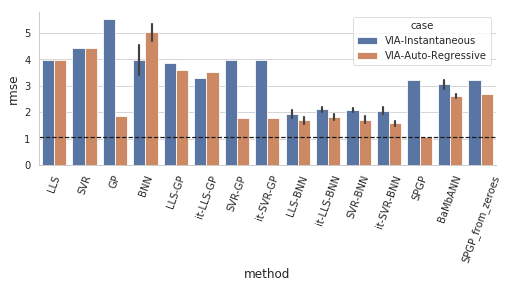

In [3]:
g = sns.catplot(x='algo', y='value', hue='case', data=df.groupby('metric').get_group('rmse'),
                height=3, aspect=2.5, ci='sd', kind='bar', sharey=False,
                order=full_algo_order, legend_out=False)
print (type(g))
#g.set_xticklabels(rotation=70)
for ax in g.axes.flat:
#    ax.set_ylim(0.0, 3.0)
    #ax.set_ylim(0.0, 5.0)
    ax.set_ylabel('rmse')
    ax.set_xlabel('method')
    ax.axhline(y=1.071414, color='k', linestyle='--')
    for label in ax.get_xticklabels():
        label.set_rotation(70)
        
plt.savefig('../images-src/bar_plot_via_rmse.svg', bbox_inches = "tight")

In [4]:
dfplot = df.groupby('metric').get_group('nllh').groupby('case').get_group('VIA-Auto-Regressive')
dfplot.sort_values(by='value')

algo  repetition  output_dim                 case metric  \
255              SPGP           0           0  VIA-Auto-Regressive   nllh   
256              SPGP           1           0  VIA-Auto-Regressive   nllh   
258              SPGP           3           0  VIA-Auto-Regressive   nllh   
259              SPGP           4           0  VIA-Auto-Regressive   nllh   
257              SPGP           2           0  VIA-Auto-Regressive   nllh   
239                GP           4           0  VIA-Auto-Regressive   nllh   
235                GP           0           0  VIA-Auto-Regressive   nllh   
236                GP           1           0  VIA-Auto-Regressive   nllh   
237                GP           2           0  VIA-Auto-Regressive   nllh   
238                GP           3           0  VIA-Auto-Regressive   nllh   
279            SVR-GP           4           0  VIA-Auto-Regressive   nllh   
278            SVR-GP           3           0  VIA-Auto-Regressive   nllh   
277            SVR-GP           2           0  VIA-Auto-Regressive   nllh   
276            SVR-GP           1           0  VIA-Auto-Regressive   nllh   
275            SVR-GP           0           0  VIA-Auto-Regressive   nllh   
298         it-SVR-GP           3           0  VIA-Auto-Regressive   nllh   
299         it-SVR-GP           4           0  VIA-Auto-Regressive   nllh   
295         it-SVR-GP           0           0  VIA-Auto-Regressive   nllh   
296         it-SVR-GP           1           0  VIA-Auto-Regressive   nllh   
297         it-SVR-GP           2           0  VIA-Auto-Regressive   nllh   
253            LLS-GP           3           0  VIA-Auto-Regressive   nllh   
250            LLS-GP           0           0  VIA-Auto-Regressive   nllh   
251            LLS-GP           1           0  VIA-Auto-Regressive   nllh   
252            LLS-GP           2           0  VIA-Auto-Regressive   nllh   
254            LLS-GP           4           0  VIA-Auto-Regressive   nllh   
245           LLS-BNN           0           0  VIA-Auto-Regressive   nllh   
261  SPGP_from_zeroes           1           0  VIA-Auto-Regressive   nllh   
260  SPGP_from_zeroes           0           0  VIA-Auto-Regressive   nllh   
264  SPGP_from_zeroes           4           0  VIA-Auto-Regressive   nllh   
263  SPGP_from_zeroes           3           0  VIA-Auto-Regressive   nllh   
..                ...         ...         ...                  ...    ...   
231           BaMbANN           1           0  VIA-Auto-Regressive   nllh   
232           BaMbANN           2           0  VIA-Auto-Regressive   nllh   
230           BaMbANN           0           0  VIA-Auto-Regressive   nllh   
233           BaMbANN           3           0  VIA-Auto-Regressive   nllh   
294        it-SVR-BNN           4           0  VIA-Auto-Regressive   nllh   
292        it-SVR-BNN           2           0  VIA-Auto-Regressive   nllh   
272           SVR-BNN           2           0  VIA-Auto-Regressive   nllh   
248           LLS-BNN           3           0  VIA-Auto-Regressive   nllh   
234           BaMbANN           4           0  VIA-Auto-Regressive   nllh   
273           SVR-BNN           3           0  VIA-Auto-Regressive   nllh   
282        it-LLS-BNN           2           0  VIA-Auto-Regressive   nllh   
291        it-SVR-BNN           1           0  VIA-Auto-Regressive   nllh   
284        it-LLS-BNN           4           0  VIA-Auto-Regressive   nllh   
271           SVR-BNN           1           0  VIA-Auto-Regressive   nllh   
281        it-LLS-BNN           1           0  VIA-Auto-Regressive   nllh   
246           LLS-BNN           1           0  VIA-Auto-Regressive   nllh   
283        it-LLS-BNN           3           0  VIA-Auto-Regressive   nllh   
247           LLS-BNN           2           0  VIA-Auto-Regressive   nllh   
270           SVR-BNN           0           0  VIA-Auto-Regressive   nllh   
280        it-LLS-BNN           0           0  VIA-Auto-Regressive   nllh   
265          

/home/sebastian/software/conda37/envs/plotting/lib/python3.7/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


<class 'seaborn.axisgrid.FacetGrid'>


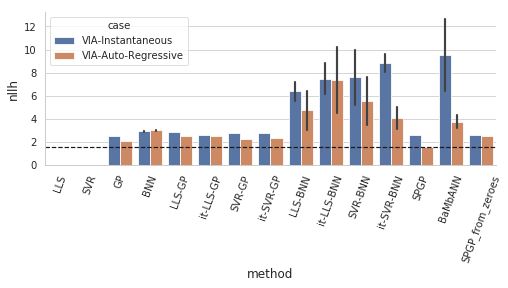

In [5]:
g = sns.catplot(x='algo', y='value', hue='case', data=df.groupby('metric').get_group('nllh'),
                height=3, aspect=2.5, ci='sd', kind='bar', sharey=False,
                order=full_algo_order, legend_out=False)
print (type(g))
#g.set_xticklabels(rotation=70)
for ax in g.axes.flat:
#    ax.set_ylim(0.0, 3.0)
    #ax.set_ylim(0.0, 5.0)
    ax.set_ylabel('nllh')
    ax.set_xlabel('method')
    ax.axhline(y=1.594907, color='k', linestyle='--')
    for label in ax.get_xticklabels():
        label.set_rotation(70)
        
plt.savefig('../images-src/bar_plot_via_nllh.svg', bbox_inches = "tight")